<a href="https://colab.research.google.com/github/SalikFillah/Final_Project_AMS/blob/main/DegreeofCentrality_PialaDuniaU20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas networkx matplotlib wordcloud

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import plotly.express as px
from wordcloud import WordCloud

**Source Crawling Data** :
https://helmisatria.com/blog/updated-crawl-data-twitter-x-maret-2024

**Keyword Crawling** :
*   pildun u20
*   batal pildun
*   tuan rumah u20
*   fifa pildun u20
*   piala dunia u-20
*   indonesia pildun u20




In [ ]:
# Memuat data dari file CSV
df = pd.read_csv('https://raw.githubusercontent.com/SalikFillah/Final_Project_AMS/main/piala-dunia-u20.csv')

# Pastikan kolom yang akan digunakan ada dalam DataFrame
print(df.shape)
df.head()

(2213, 16)


,Unnamed: 0,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,0,1663517325038059521,Tue May 30 22:51:14 +0000 2023,0,@bilinang @alief13fj @GOAL_ID Momen langka aja...,1663679490231521280,NaN,lhflhdjraxupdh,in,NaN,0,1,0,https://twitter.com/gatauahdark/status/1663679...,1070505077708775425,gatauahdark
1,1,1663429572648652800,Tue May 30 17:02:22 +0000 2023,0,@Tanto19 @elisa_jkt La wong polemik pildun U20...,1663591692468117506,NaN,Tanto19,in,"Jakarta Utara, DKI Jakarta",0,0,0,https://twitter.com/WarasWareg/status/16635916...,1258790509247512578,WarasWareg
2,2,1663453500716773377,Tue May 30 13:07:13 +0000 2023,0,@Ariocaturp @LaGrandeIndo Atau Argentina yg la...,1663532515964092416,NaN,Ariocaturp,in,"DKI Jakarta, Indonesia",0,0,0,https://twitter.com/adiazizi_/status/166353251...,1482522347877781505,adiazizi_
3,3,1660602612868354048,Tue May 30 11:38:34 +0000 2023,0,@Viechar_Zoel @ardynshufi Prasangka buruk gw p...,1663510205014110210,NaN,Viechar_Zoel,in,majalengka,0,0,0,https://twitter.com/tri_sevtian/status/1663510...,1958707836,tri_sevtian
4,4,1661145748657037313,Tue May 30 09:39:00 +0000 2023,1,@Dahnilanzar @prabowo @persib Ini baru Capress...,1663480118319415296,NaN,Dahnilanzar,in,Cilegon - Banten,0,0,0,https://twitter.com/TRIKAWH/status/16634801183...,105184740,TRIKAWH


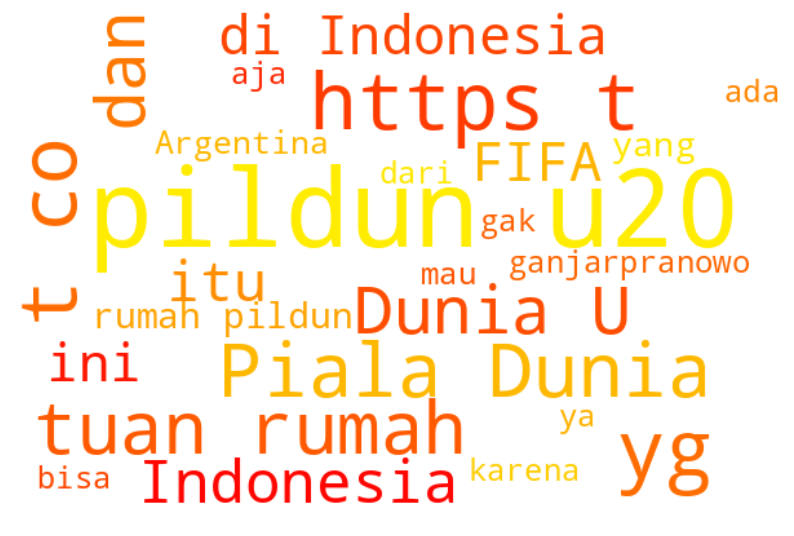

In [ ]:
# Melihat Plot WordCloud
allWords = ' '.join( [twts for twts in df['full_text']] )
wordCloud = WordCloud(background_color = "white",
                      width = 600,
                      height = 400,
                      max_words = 25,
                      colormap = 'autumn_r').generate(allWords)
plt.figure(figsize = (10,10))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# extract user mentioned in tweet
def extract_mentions(text):
  mention = re.findall(r'@(\w+)', text)
  return mention

# user mention data based on year
def mention_year(dataframe):
  data = dataframe
  # user data that mentions
  data_mention = []
  for _, row in data.iterrows():
    username = row['username']
    mentions = extract_mentions(row['full_text'])
    for target in mentions:
      data_mention.append({'username': username, 'mention': target})

  return data_mention

# call function
df_baru = pd.DataFrame(mention_year(df))
df_baru.head()

,username,mention
0,gatauahdark,bilinang
1,gatauahdark,alief13fj
2,gatauahdark,GOAL_ID
3,WarasWareg,Tanto19
4,WarasWareg,elisa_jkt


In [ ]:
# select the number of users mentioned
N = 10
mention_counts = df_baru['mention'].value_counts().iloc[:N]

# horizontal bar plot
fig = px.bar(df_baru, x=mention_counts.values, y=mention_counts.index)

# figure layout & size
fig.update_layout(
    title='Top {} Users Mentioned'.format(N),
    xaxis_title='Number of Mentions',
    yaxis_title='User Mentioned',
    autosize=False,
    width=1200,
    height=600,
    margin=dict(l=30, r=30, b=50, t=50),
    bargap=0.5)

fig.update_traces(textposition='outside')
fig.show()

In [ ]:
# rancang graf
def graph(dataframe):
  data = dataframe
  # new graph variable
  G = nx.Graph()
  # add nodes and edges
  for _, row in data.iterrows():
    G.add_node(row["username"])
    G.add_node(row["mention"])
    G.add_edge(row["username"], row["mention"])

  return G

G = graph(df_baru)

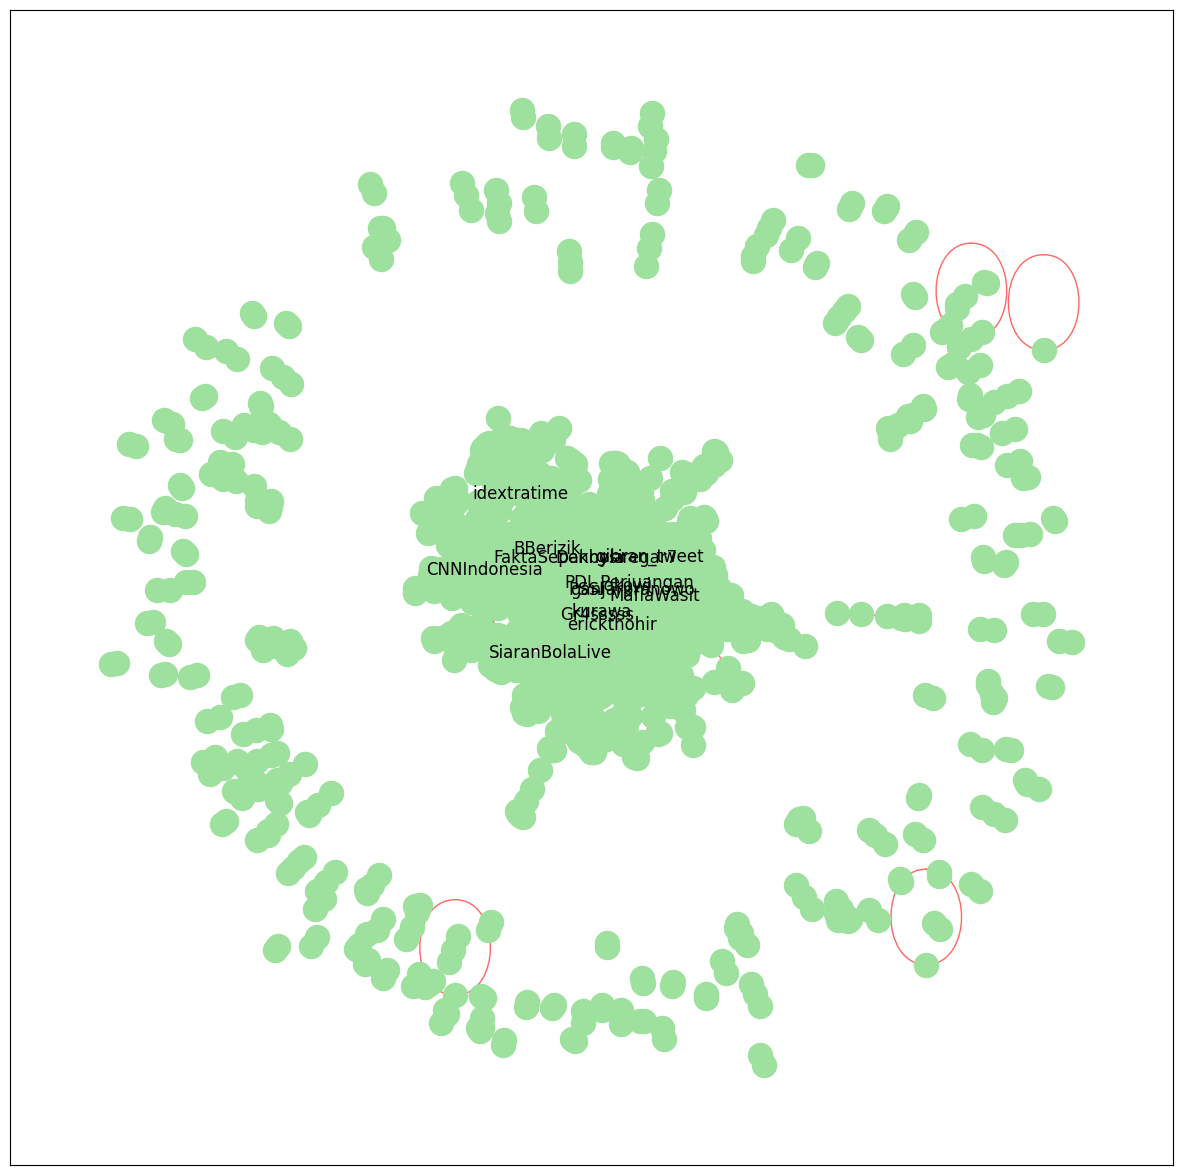

In [ ]:
# menampilkan simpul dengan jumlah sisi lebih dari 20
labels = {node: node for node, degree in G.degree() if degree > 20}

plt.figure(figsize=(15, 15))
nx.draw_networkx(G, labels=labels, with_labels=True,
                 node_color='#9EE09E', edge_color='#FF6663')
plt.show()

In [ ]:
# analisis sentralitas
deg_centrality = nx.degree_centrality(G)

# urutkan skor sentralitas
sorted_centrality = sorted(deg_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_centrality = sorted_centrality[:10]

# Tampilkan 10 simpul dengan skor sentralitas terbesar
print("10 simpul dengan skor sentralitas terbesar:")
for node, centrality in top_10_centrality:
  print(f"Simpul: {node}, Skor Sentralitas: {centrality}")

10 simpul dengan skor sentralitas terbesar:
Simpul: ganjarpranowo, Skor Sentralitas: 0.0997275204359673
Simpul: idextratime, Skor Sentralitas: 0.04359673024523161
Simpul: erickthohir, Skor Sentralitas: 0.03760217983651226
Simpul: FaktaSepakbola, Skor Sentralitas: 0.03106267029972752
Simpul: Dennysiregar7, Skor Sentralitas: 0.02779291553133515
Simpul: gibran_tweet, Skor Sentralitas: 0.026702997275204362
Simpul: BBerizik, Skor Sentralitas: 0.02561307901907357
Simpul: jokowi, Skor Sentralitas: 0.018528610354223433
Simpul: PSSI, Skor Sentralitas: 0.018528610354223433
Simpul: PDI_Perjuangan, Skor Sentralitas: 0.017438692098092644


**Kesimpulan**:

Setelah melakukan analisis "degree of centrality" pada data cuitan media sosial twitter mengenai batalnya Indonesia menjadi tuan rumah piala dunia u-20, diperoleh bahwa banyak sekali netizen atau warganet twitter yang menyebut adanya keterlibatan beberapa instansi pemerintahan (PSSI dan PDI Perjuangan) bahkan tokoh-tokoh politik seperti bapak **ganjar pranowo** dan bapak presiden jokowi dalam kasus ini.

Setelah diulik lebih lanjut, ternyata memang benar adanya, khususnya bapak ganjar pranowo melalui salah satu statement nya yang sempat viral pada saat itu terkait **penolakan** beliau terhadap kedatangan negara **Israel** untuk berpartisi dalam piala dunia u-20 di Indonesia akibat konflik yang mereka sedang alami dengan negara palestina. Pengakuan bapak ganjar pranowo yang menyeret **isu politik** ke dalam lingkup sepak bola tersebut pada akhirnya disinyalir menjadi salah satu penyebab dicabutnya status negara Indonesia sebagai **tuan rumah** piala dunia U-20.